<center><h1> West Midlands' Carbon Footprint </h1></center>

### Understanding the Data 

<!-- <ul> -->
<!--  <li><h2> Understanding the Data</h2></li> -->
<!--  <li>Handling Missing Values</li> -->
<!--  <li>Remove Duplicates</li> -->
<!--  <li>Standardize Formats</li> -->
<!--  <li>Handle Outliers</li> -->
<!--  <li>Validate and correct data</li>  -->
<!--  <li>Document Changes</li> -->
<!--  <li>Test and iterate</li> -->
<!--  <li>Maintain data provence</li>   -->     
<!-- </ul> -->


<P><b>Internet Repositories:</b></P>

<!-- <P><a href="https://www.gov.uk/government/statistics/uks-carbon-footprint">https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
</a></P> -->  

Data: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx

From exploration of the '1_1' sheet

 Shape of the Data: The dataset contains 7106 rows and 50 columns.
 Summary of the Data: 
   The dataset provides details for 27 unique regions/countries.
   There are data for 17 unique years, likely spanning from 2005 to 2021.
   Variables such as 'Industry Electricity', 'Industry Gas', and 'Industry Total' 
 Missing Values: 
   The 'Local Authority Code' has 748 missing values. 




In [1]:
import pandas as pd

# Get the names of the sheets in the Excel file
sheet_names = pd.ExcelFile("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx").sheet_names
sheet_names


['Cover',
 'Contents',
 '1_1',
 '1_2',
 '1_3',
 '1_4',
 '2_1',
 '3_1',
 '3_2',
 '4_1',
 '4_1_Notes',
 '4_2',
 '4_3',
 '4_4',
 '4_5',
 '5_1']

In [2]:
# Load the first few rows from the '1_1' sheet to explore its contents
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')
data_1_1.head()


,Table 1.1: Local Authority territorial greenhouse gas emissions estimates 2005-2021 (kt CO2e) - Full dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,This worksheet contains one table. The table c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Freeze panes are active on this sheet. To turn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Filters are active in cells A5 to AX5 and may ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
4,North East,Darlington,Darlington,E06000005,2005,51.87311,114.701874,0.045681,43.073543,209.694209,...,12.699185,63.7069,34.256022,5.613394,39.869415,968.661604,100.287,9.658895,197.4758,4.905217


In [3]:
# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Display the shape of the data
data_shape = data_1_1_actual.shape

# Get a summary of the data
data_summary = data_1_1_actual.describe()

# Check for missing values
missing_values = data_1_1_actual.isnull().sum()

data_shape, data_summary.head(), missing_values.head()


((7106, 50),
 3      Region/Country Second Tier Authority Local Authority  \
 count            7106                  7106            7106   
 unique             27                   194             418   
 top        South East              Scotland      Darlington   
 freq             1190                   544              17   
 
 3      Local Authority Code  Calendar Year  Industry Electricity  \
 count                  6358           7106            7106.00000   
 unique                  374             17            7106.00000   
 top               E06000005           2005              51.87311   
 freq                     17            418               1.00000   
 
 3       Industry Gas   Large Industrial Installations  Industry 'Other'  \
 count            7106                            7106              7106   
 unique           7002                            6118              7073   
 top                 0                               0                 0   
 freq         

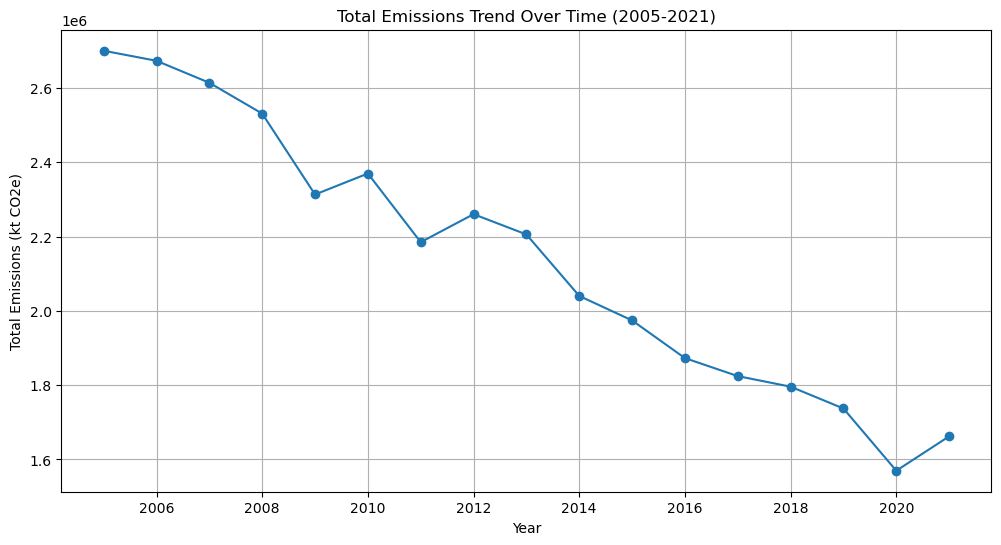

In [4]:
import matplotlib.pyplot as plt



# Group by 'Calendar Year' and sum the 'Grand Total' column to get total emissions for each year
yearly_emissions = data_1_1_actual.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the trend over time
plt.figure(figsize=(12, 6))
yearly_emissions.plot(marker='o', linestyle='-')
plt.title('Total Emissions Trend Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


In [5]:
# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Group by 'Region/Country' and sum the 'Grand Total' column to get total emissions for each region again
regional_emissions = data_1_1_actual.groupby('Region/Country')['Grand Total'].sum()

# Identify the regions with the highest and lowest cumulative emissions
highest_emission_region = regional_emissions.idxmax()
lowest_emission_region = regional_emissions.idxmin()

highest_emission_value = regional_emissions.max()
lowest_emission_value = regional_emissions.min()

highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value


('National Total', 8763483.862937795, 'Unallocated', 70997.7272303627)

In [6]:
# Compute average per capita emissions
data_1_1_actual['Per Capita Emissions'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce') / \
                                          pd.to_numeric(data_1_1_actual["Population ('000s, mid-year estimate)"], errors='coerce')

# Compute average emissions per km^2
data_1_1_actual['Emissions per km^2'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce') / \
                                        pd.to_numeric(data_1_1_actual['Area (km2)'], errors='coerce')

# Group by 'Region/Country' to get average per capita emissions and emissions per km^2 for each region
average_emissions = data_1_1_actual.groupby('Region/Country')[['Per Capita Emissions', 'Emissions per km^2']].mean()

average_emissions.head()


3,Per Capita Emissions,Emissions per km^2
Region/Country,,
East Midlands,9.710848,5.318442
East Midlands Total,8.668612,2.514725
East of England,8.091197,5.769531
East of England Total,7.929507,2.398958
England Total,7.523039,3.022770


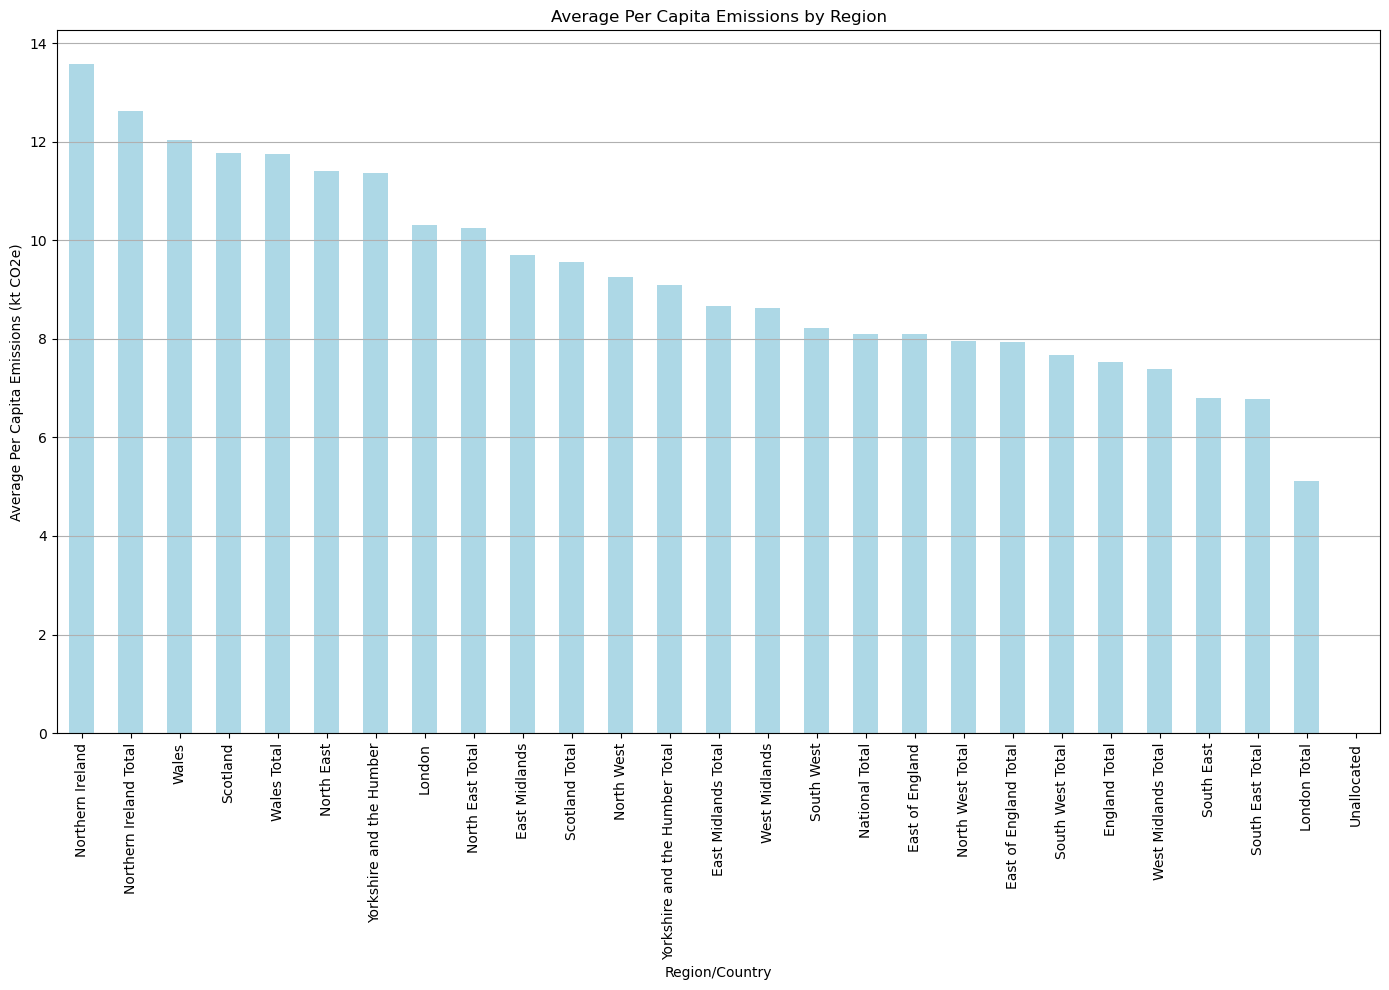

In [7]:
# Sort the regions based on average per capita emissions
sorted_per_capita = average_emissions['Per Capita Emissions'].sort_values(ascending=False)

# Plotting average per capita emissions for each region
plt.figure(figsize=(14, 10))
sorted_per_capita.plot(kind='bar', color='lightblue')
plt.title('Average Per Capita Emissions by Region')
plt.ylabel('Average Per Capita Emissions (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


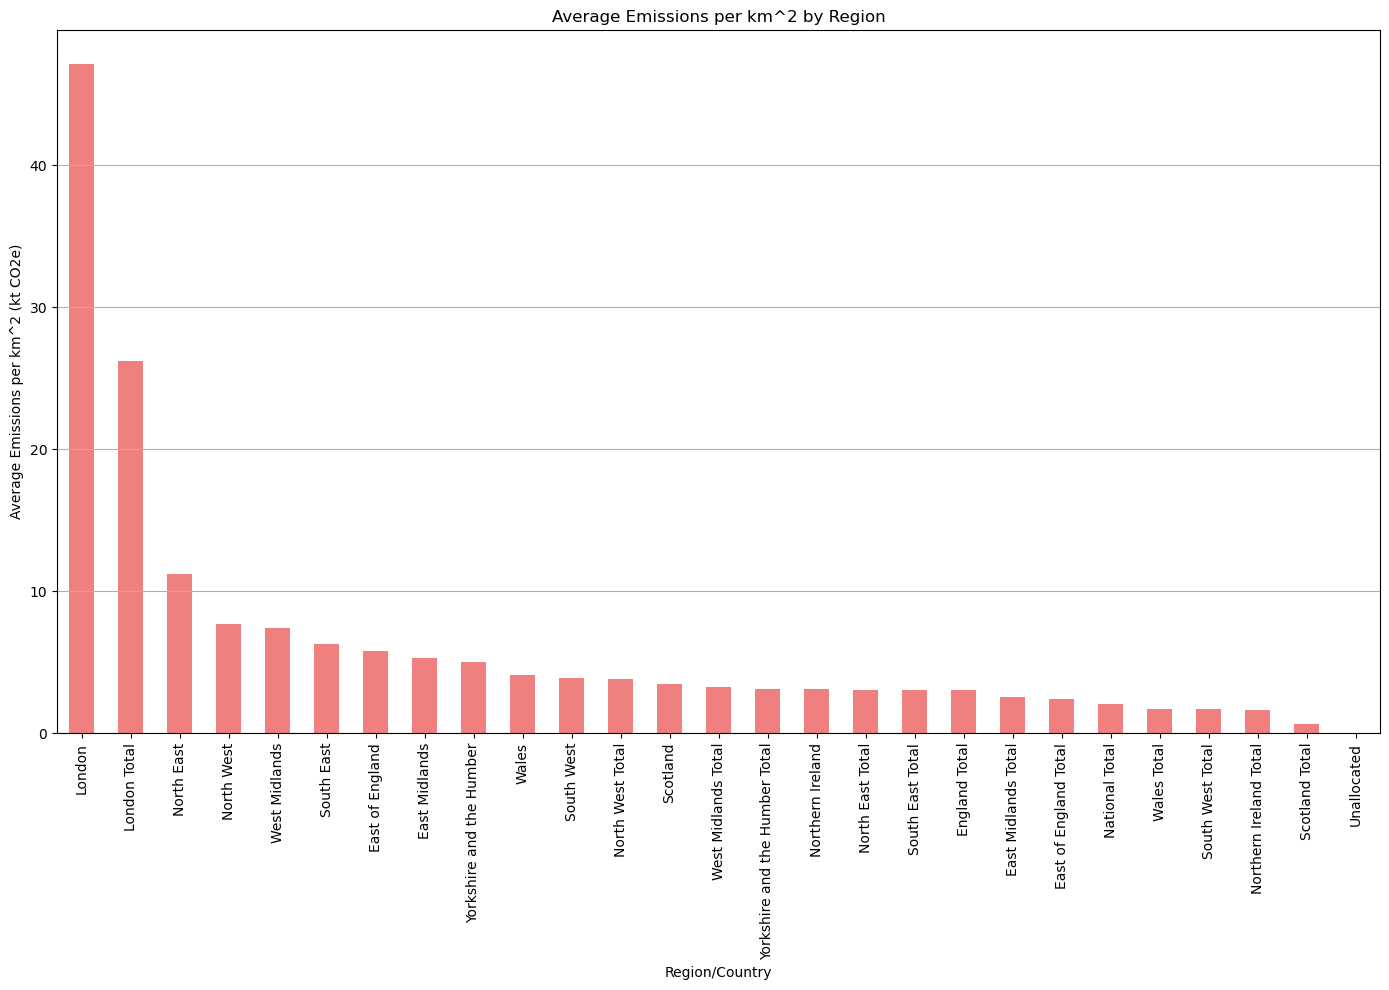

In [8]:
# Sort the regions based on average emissions per km^2
sorted_per_km2 = average_emissions['Emissions per km^2'].sort_values(ascending=False)

# Plotting average emissions per km^2 for each region
plt.figure(figsize=(14, 10))
sorted_per_km2.plot(kind='bar', color='lightcoral')
plt.title('Average Emissions per km^2 by Region')
plt.ylabel('Average Emissions per km^2 (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


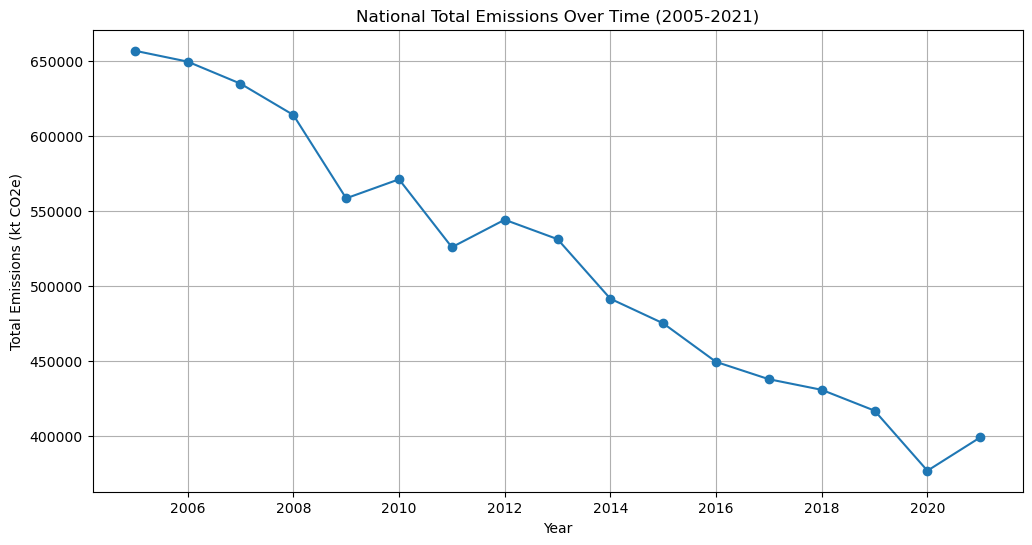

In [9]:
# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


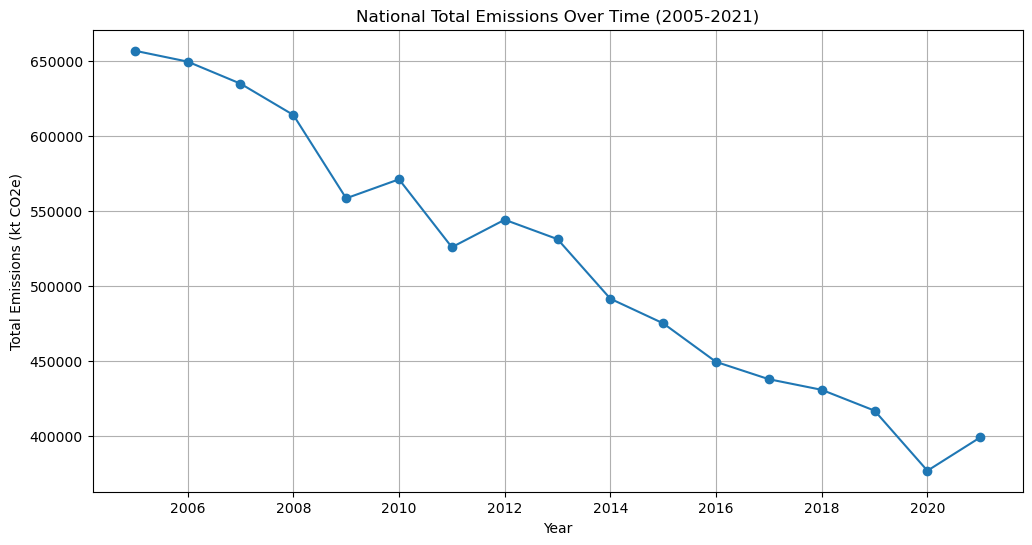

In [10]:
# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions again
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


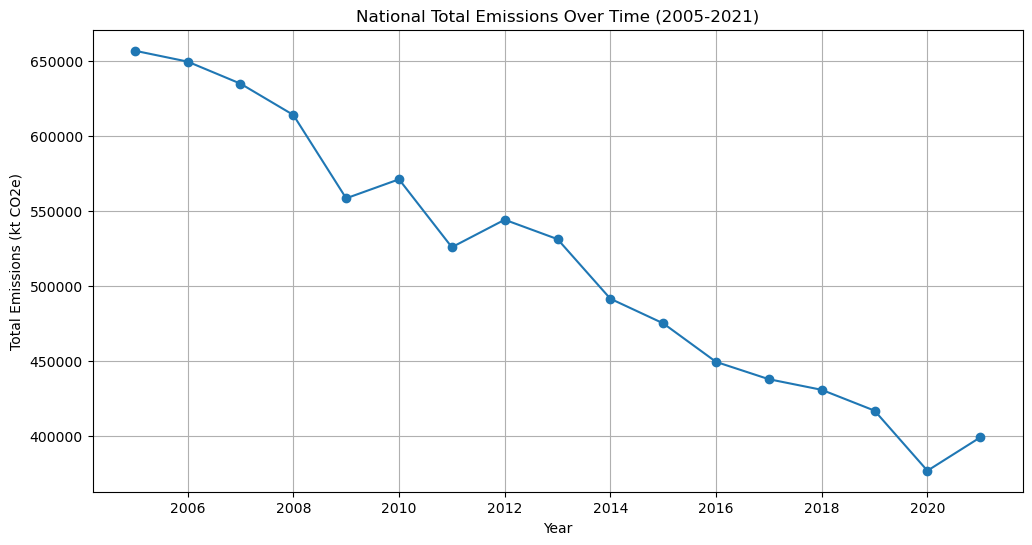

In [11]:
# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


In [12]:
# Decompose the time series with a specified period of 1 (yearly data)
decomposition = seasonal_decompose(national_time_series, model='additive', period=1)

# Plotting the decomposition components
plt.figure(figsize=(14, 12))
plt.subplot(4, 1, 1)
plt.plot(national_time_series, label='Original')
plt.legend(loc='upper left')
plt.title('National Total Emissions Over Time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'seasonal_decompose' is not defined

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Conduct Augmented Dickey-Fuller test
adf_result = adfuller(national_time_series)

# Extract the p-value
p_value = adf_result[1]

p_value


0.9171724950612403

In [ ]:
# Apply first-order differencing to the time series
national_time_series_diff = national_time_series.diff().dropna()

# Conduct Augmented Dickey-Fuller test on the differenced series
adf_result_diff = adfuller(national_time_series_diff)

# Extract the p-value for the differenced series
p_value_diff = adf_result_diff[1]

p_value_diff


0.22240697481609656

The p-value for the differenced series is approximately 
0.222
0.222. Although this is lower than the original p-value, it's still greater than the significance level of 
0.05
0.05. Therefore, the differenced series is also considered non-stationary based on this test.

This might necessitate the use of more advanced differencing techniques, transformations, or models that can handle non-stationary data (like ARIMA with integration order greater than 1).

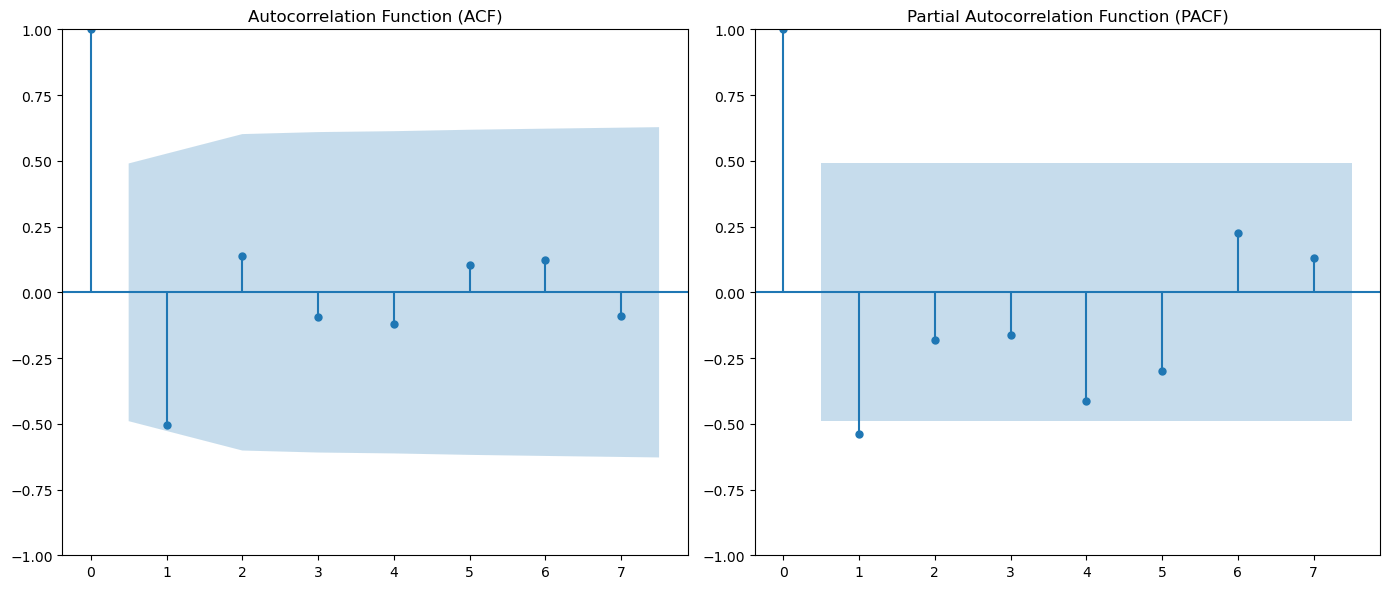

In [ ]:
# Adjusting the number of lags for the short time series and plotting ACF and PACF again
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(national_time_series_diff, lags=7, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(national_time_series_diff, lags=7, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets (using 80% of the data for training)
train_size = int(len(national_time_series) * 0.8)
train, test = national_time_series[0:train_size], national_time_series[train_size:]

# Fit the ARIMA(1,2,2) model
model = ARIMA(train, order=(1,2,2))
model_fit = model.fit(disp=0)

# Forecast emissions for the test set
forecast = model_fit.forecast(steps=len(test))[0]

# Calculate the mean squared error
mse = mean_squared_error(test, forecast)

mse


c:\Users\Olajide\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Olajide\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Olajide\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


TypeError: ARIMA.fit() got an unexpected keyword argument 'disp'

In [ ]:

forecast = model_fit.forecast(steps=len(test))


mse = mean_squared_error(test.values, forecast)

mse


c:\Users\Olajide\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


398563329.8150727

The mean squared error (MSE) for the ARIMA(1,2,2) model on the test set is approximately 
398,563,329.78
398,563,329.78 kt CO2CO2​ e^2.

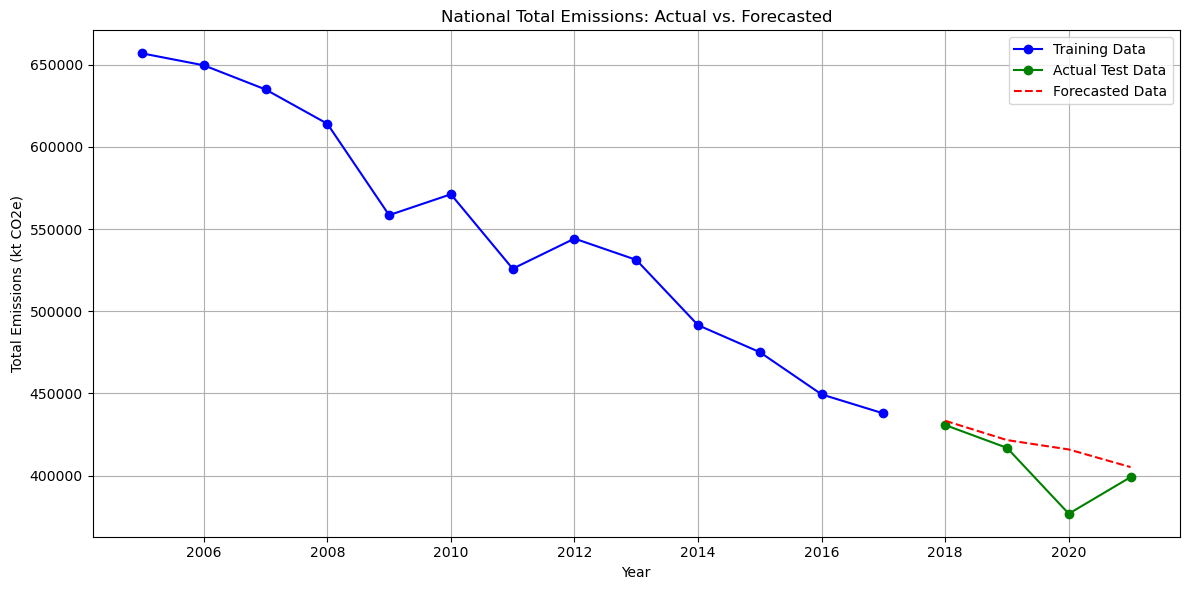

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Training Data', color='blue', marker='o')
plt.plot(test.index, test.values, label='Actual Test Data', color='green', marker='o')
plt.plot(test.index, forecast, label='Forecasted Data', color='red', linestyle='--')
plt.title('National Total Emissions: Actual vs. Forecasted')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The plot illustrates the actual vs. forecasted national total emissions:

Blue Line: Training data used to fit the ARIMA model.
Green Line: Actual emissions data from the test set.
Red Dashed Line: Forecasted emissions using the ARIMA(1,2,2) model.

While the forecast captures the general downward trend in emissions, there are discrepancies between the actual and forecasted values, which are reflected in the MSE we computed earlier.

From this visualization, one can assess the potential utility of the model and consider making adjustments or exploring other models for improved forecasting accuracy.


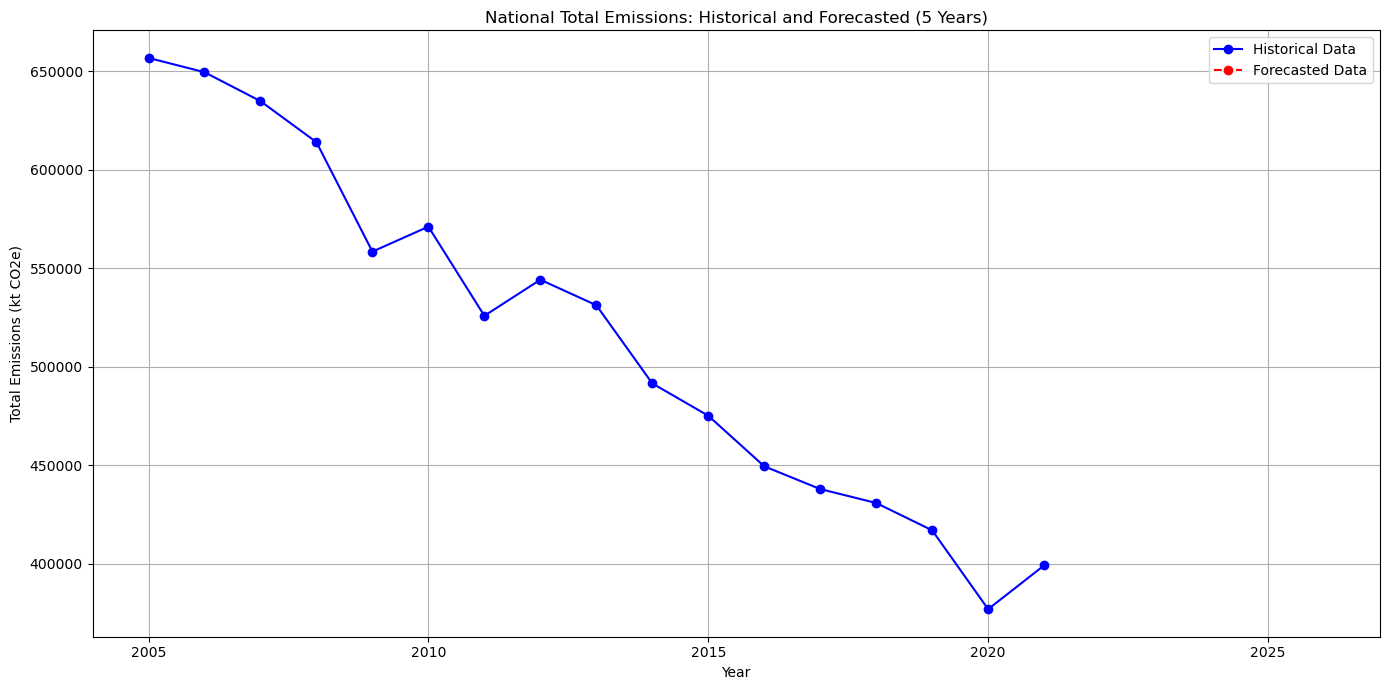

In [ ]:

# Plotting the historical data along with the forecasted emissions with a clear view of 2022 to 2026
plt.figure(figsize=(14, 7))
plt.plot(national_time_series.index, national_time_series.values, label='Historical Data', color='blue', marker='o')
plt.plot(forecast_series.index, forecast_series.values, label='Forecasted Data', color='red', linestyle='--', marker='o')
plt.title('National Total Emissions: Historical and Forecasted (5 Years)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.xlim(2004, 2027)  # Adjust x-axis limits to clearly display 2022 to 2026
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Displaying the columns of the dataset to understand its structure
data_5_1.columns


Index(['Local Authority District Name', 'Operator', 'Site', 'Postcode',
       'Reference', 'Substance Name', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [ ]:
# Use all the year columns for our dataset
dataset = dataframe.loc[:, '2005':'2021'].values.astype('float32')


In [ ]:
dataset = dataframe.loc[:, '2005':'2021'].sum(axis=0).values.astype('float32').reshape(-1, 1)


In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse scaling
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

from sklearn.metrics import mean_squared_error
trainScore = np.sqrt(mean_squared_error(y_train[0], trainPredict[:, 0]))
testScore = np.sqrt(mean_squared_error(y_test[0], testPredict[:, 0]))

print(f'Train Score: {trainScore} RMSE')
print(f'Test Score: {testScore} RMSE')


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_train[0], label='Actual Train Data')
plt.plot(trainPredict, label='Predicted Train Data')
plt.plot([None for _ in y_train[0]] + [x for x in y_test[0]], label='Actual Test Data')
plt.plot([None for _ in y_train[0]] + [x for x in testPredict], label='Predicted Test Data')
plt.title('Emissions Forecasting using LSTM')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Load the first few rows from the '1_1' sheet to explore its contents
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')
data_1_1_head = data_1_1.head()

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Display the shape of the data
data_shape = data_1_1_actual.shape

# Get a summary of the data
data_summary = data_1_1_actual.describe()

# Check for missing values
missing_values = data_1_1_actual.isnull().sum()

data_shape, data_summary.head(), missing_values.head()


((7106, 50),
 3      Region/Country Second Tier Authority Local Authority  \
 count            7106                  7106            7106   
 unique             27                   194             418   
 top        South East              Scotland      Darlington   
 freq             1190                   544              17   
 
 3      Local Authority Code  Calendar Year  Industry Electricity  \
 count                  6358           7106            7106.00000   
 unique                  374             17            7106.00000   
 top               E06000005           2005              51.87311   
 freq                     17            418               1.00000   
 
 3       Industry Gas   Large Industrial Installations  Industry 'Other'  \
 count          7106.0                          7106.0            7106.0   
 unique         7002.0                          6118.0            7073.0   
 top               0.0                             0.0               0.0   
 freq         

In [ ]:
# Filter rows that contain the word "Total" in the "Second Tier Authority" column
data_totals_only = data_1_1_actual[data_1_1_actual['Second Tier Authority'].str.contains("Total")]

# Drop rows with cities that have their individual data and are also part of the "Total"
data_totals_cleaned = data_totals_only.drop_duplicates(subset=["Local Authority"], keep="last")

data_totals_cleaned.shape, data_totals_cleaned.head()


((42, 50),
 3      Region/Country Second Tier Authority   Local Authority  \
 220  North East Total      North East Total  North East Total   
 339        North West        Cheshire Total    Cheshire Total   
 458        North West         Cumbria Total     Cumbria Total   
 713        North West      Lancashire Total  Lancashire Total   
 951  North West Total      North West Total  North West Total   
 
 3   Local Authority Code Calendar Year Industry Electricity Industry Gas   \
 220                  NaN          2021           853.658549   1159.443753   
 339                  NaN          2021           273.199898    476.733475   
 458                  NaN          2021           212.340071    440.506776   
 713                  NaN          2021           369.051398    585.409713   
 951                  NaN          2021          1893.992418   3543.715328   
 
 3   Large Industrial Installations Industry 'Other' Industry Total  ...  \
 220                    1702.307744       594

C:\Users\Olajide\AppData\Local\Temp\ipykernel_70564\1700835385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totals_cleaned['Per Capita Emissions (tCO2e)'] = pd.to_numeric(data_totals_cleaned['Per Capita Emissions (tCO2e)'], errors='coerce')


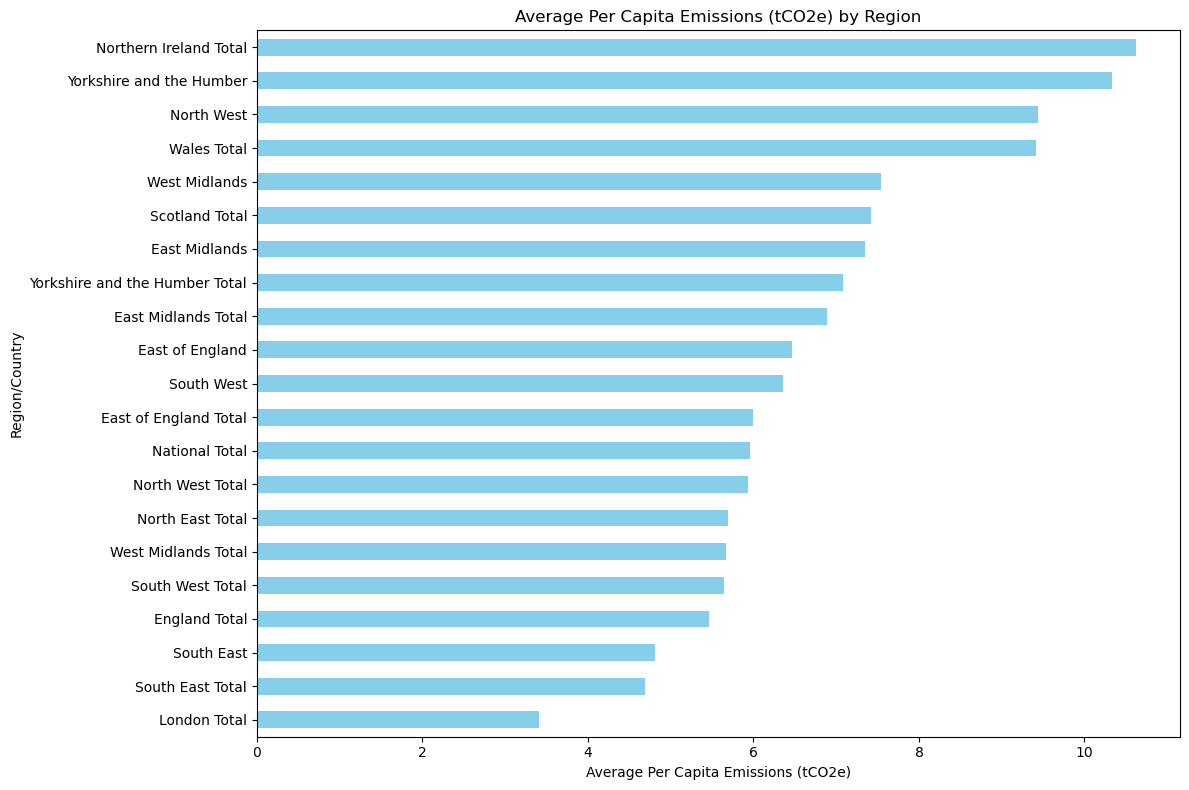

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Per Capita Emissions (tCO2e)' column to numeric for calculation
data_totals_cleaned['Per Capita Emissions (tCO2e)'] = pd.to_numeric(data_totals_cleaned['Per Capita Emissions (tCO2e)'], errors='coerce')

# Group by 'Region/Country' and calculate the mean of 'Per Capita Emissions (tCO2e)'
avg_per_capita_emissions = data_totals_cleaned.groupby('Region/Country')['Per Capita Emissions (tCO2e)'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
avg_per_capita_emissions.plot(kind='barh', color='skyblue')
plt.title('Average Per Capita Emissions (tCO2e) by Region')
plt.xlabel('Average Per Capita Emissions (tCO2e)')
plt.ylabel('Region/Country')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


# Given data
school_data = {
    "School": ["East Midlands", "East of England", "London", "North East", "North West", 
               "Northern Ireland", "Scotland", "South East", "South West", "Unallocated", 
               "Wales", "West Midlands", "Yorkshire and the Humber"],
    "Sum of total sum": [4418074.00, 5413064.00, 2331708.80, 1550275.90, 4896660.00, 
                         1450808.50, 4043213.30, 5997305.20, 4044928.60, 212991.90, 
                         2250258.80, 3559248.40, 3341519.40]
}

# Convert to DataFrame
df_school = pd.DataFrame(school_data)

# Plotting
plt.figure(figsize=(14, 8))
df_school.sort_values(by="Sum of total sum", ascending=True).plot(x="School", y="Sum of total sum", kind="barh", legend=False, color="lightseagreen", figsize=(14, 8))
plt.title("Total Sum by School")
plt.xlabel("Total Sum")
plt.ylabel("School")
plt.tight_layout()
plt.show()


In [ ]:
# Plotting the bar chart again
plt.figure(figsize=(14, 8))
df_school.sort_values(by="Sum of total sum", ascending=True).plot(x="School", y="Sum of total sum", kind="barh", legend=False, color="lightseagreen", figsize=(14, 8))
plt.title("Total Sum by School")
plt.xlabel("Total Sum")
plt.ylabel("School")
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

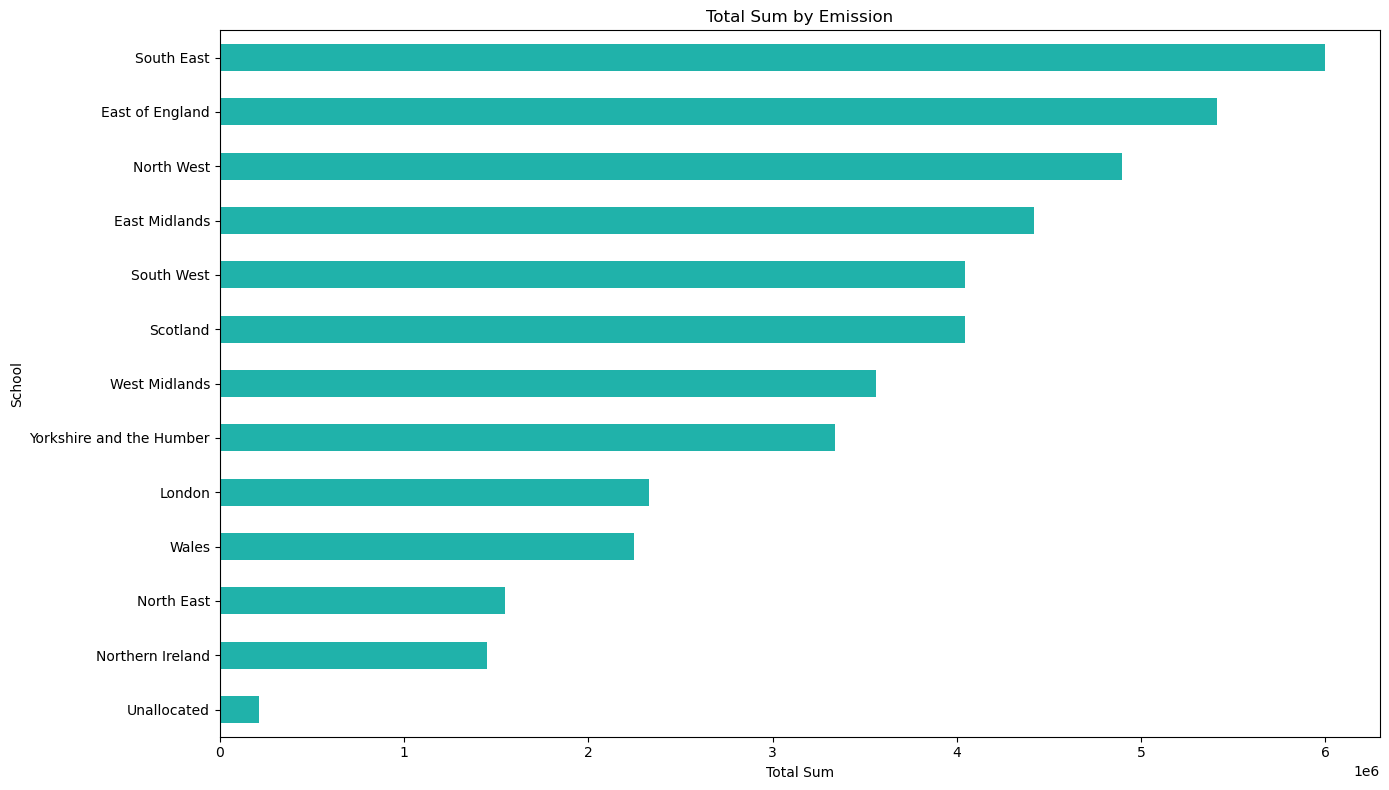

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
school_data = {
    "School": ["East Midlands", "East of England", "London", "North East", "North West", 
               "Northern Ireland", "Scotland", "South East", "South West", "Unallocated", 
               "Wales", "West Midlands", "Yorkshire and the Humber"],
    "Sum of total sum": [4418074.00, 5413064.00, 2331708.80, 1550275.90, 4896660.00, 
                         1450808.50, 4043213.30, 5997305.20, 4044928.60, 212991.90, 
                         2250258.80, 3559248.40, 3341519.40]
}

# Convert to DataFrame
df_school = pd.DataFrame(school_data)

# Plotting the bar chart
plt.figure(figsize=(14, 8))
df_school.sort_values(by="Sum of total sum", ascending=True).plot(x="School", y="Sum of total sum", kind="barh", legend=False, color="lightseagreen", figsize=(14, 8))
plt.title("Total Sum by Emission")
plt.xlabel("Total Sum")
plt.ylabel("School")
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

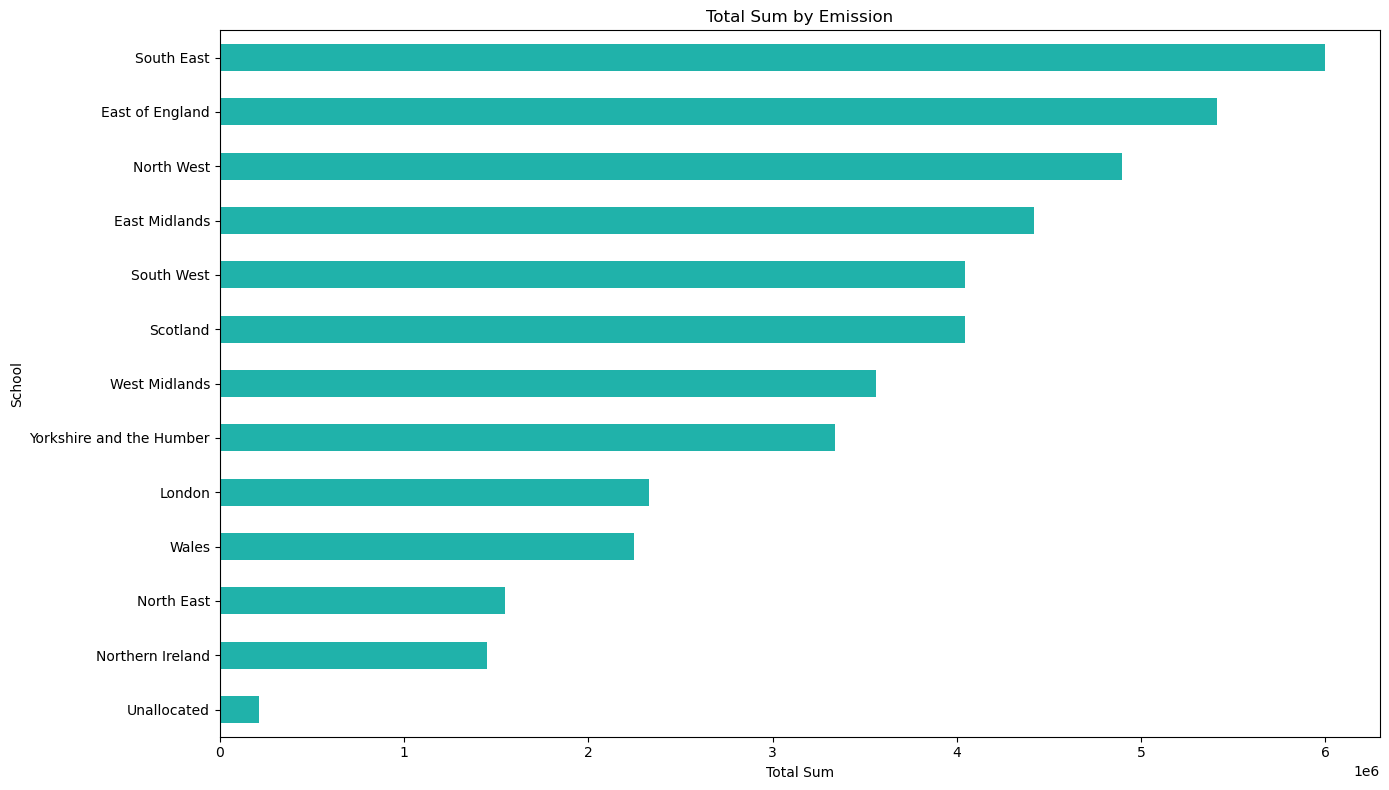

In [65]:
# Given data
school_data = {
    "School": ["East Midlands", "East of England", "London", "North East", "North West", 
               "Northern Ireland", "Scotland", "South East", "South West", "Unallocated", 
               "Wales", "West Midlands", "Yorkshire and the Humber"],
    "Sum of total sum": [4418074.00, 5413064.00, 2331708.80, 1550275.90, 4896660.00, 
                         1450808.50, 4043213.30, 5997305.20, 4044928.60, 212991.90, 
                         2250258.80, 3559248.40, 3341519.40]
}

# Convert to DataFrame
df_school = pd.DataFrame(school_data)

# Plotting
plt.figure(figsize=(14, 8))
df_school.sort_values(by="Sum of total sum", ascending=True).plot(x="School", y="Sum of total sum", kind="barh", legend=False, color="lightseagreen", figsize=(14, 8))
plt.title("Total Sum by Emission")
plt.xlabel("Total Sum")
plt.ylabel("School")
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

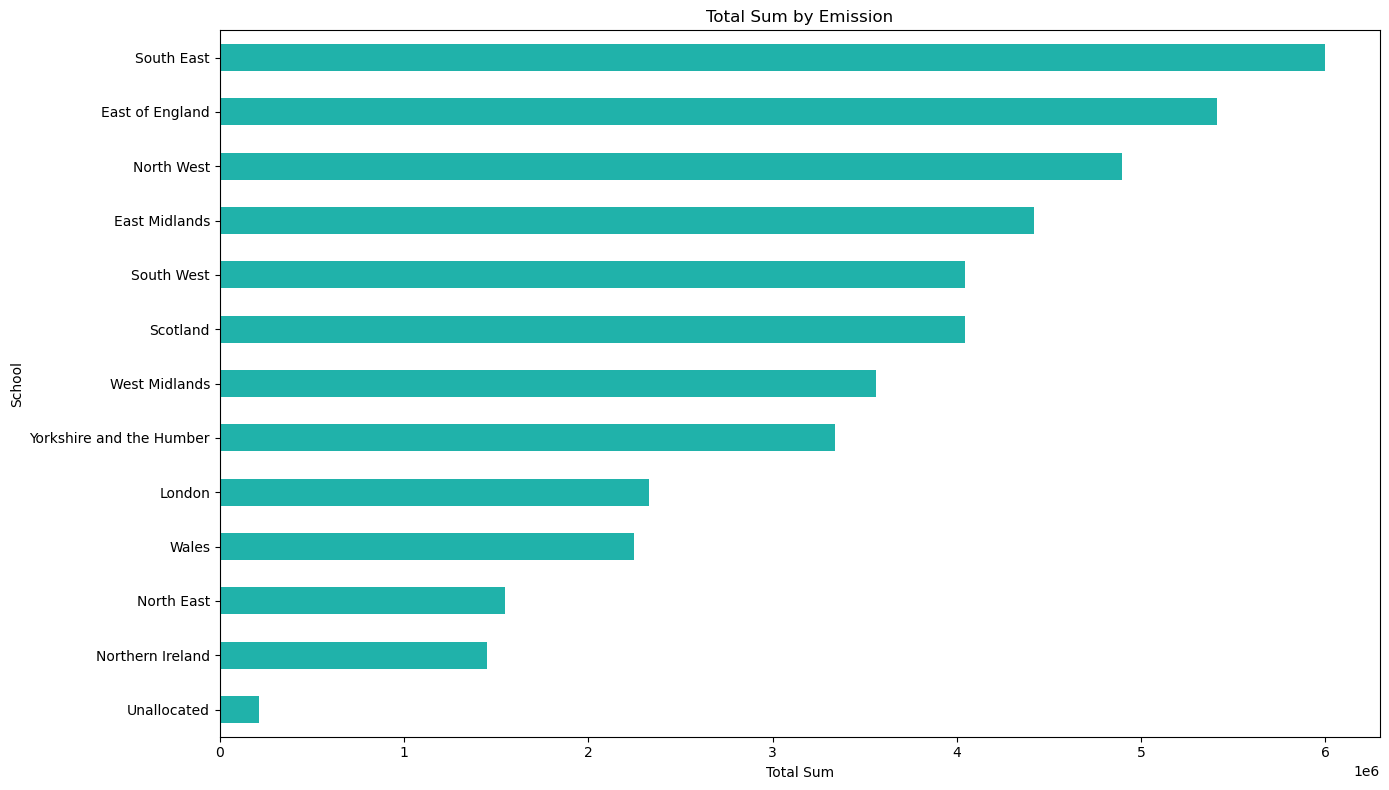

In [64]:
# Plotting the bar chart again
plt.figure(figsize=(14, 8))
df_school.sort_values(by="Sum of total sum", ascending=True).plot(x="School", y="Sum of total sum", kind="barh", legend=False, color="lightseagreen", figsize=(14, 8))
plt.title("Total Sum by Emission")
plt.xlabel("Total Sum")
plt.ylabel("School")
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

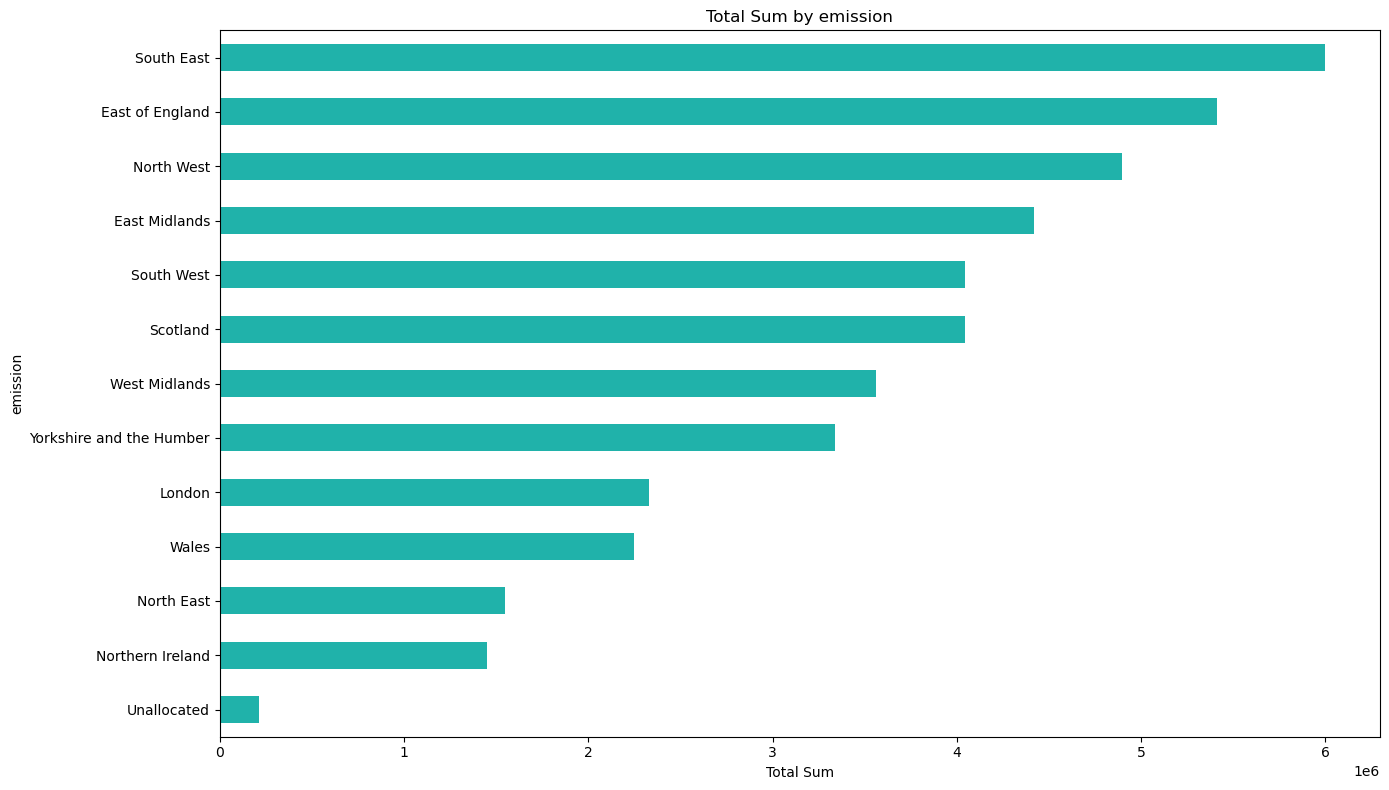

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
emission_data = {
    "emission": ["East Midlands", "East of England", "London", "North East", "North West", 
               "Northern Ireland", "Scotland", "South East", "South West", "Unallocated", 
               "Wales", "West Midlands", "Yorkshire and the Humber"],
    "Sum of total sum": [4418074.00, 5413064.00, 2331708.80, 1550275.90, 4896660.00, 
                         1450808.50, 4043213.30, 5997305.20, 4044928.60, 212991.90, 
                         2250258.80, 3559248.40, 3341519.40]
}

# Convert to DataFrame
df_emission = pd.DataFrame(emission_data)

# Plotting the bar chart
plt.figure(figsize=(14, 8))
df_emission.sort_values(by="Sum of total sum", ascending=True).plot(x="emission", y="Sum of total sum", kind="barh", legend=False, color="lightseagreen", figsize=(14, 8))
plt.title("Total Sum by emission")
plt.xlabel("Total Sum")
plt.ylabel("emission")
plt.tight_layout()
plt.show()


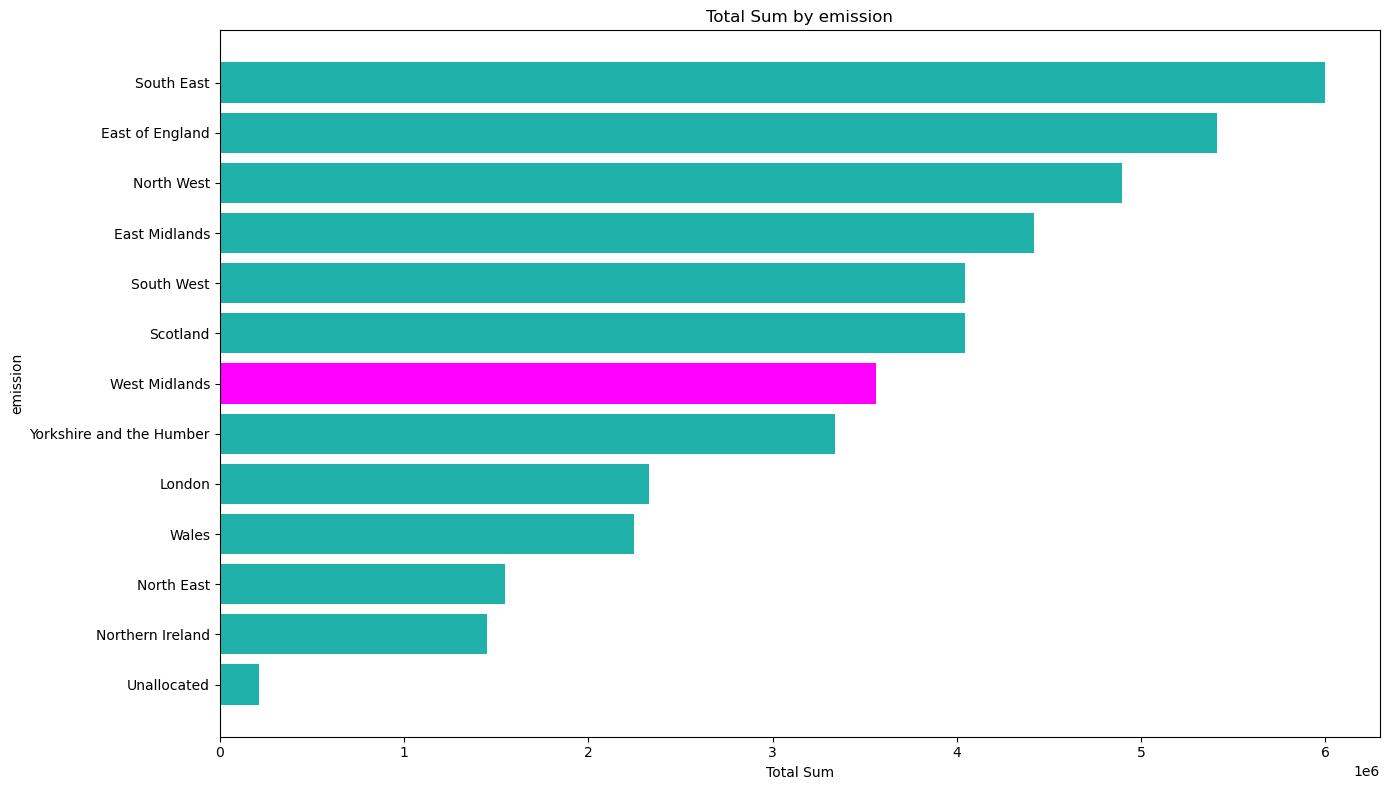

In [63]:

emission = ['lightseagreen' if school != "Scotland" else 'magenta' for school in df_school["School"]]


plt.figure(figsize=(14, 8))
df_emission_sorted = df_emission.sort_values(by="Sum of total sum", ascending=True)
plt.barh(df_emission_sorted["emission"], df_emission_sorted["Sum of total sum"], color=emission)
plt.title("Total Sum by emission")
plt.xlabel("Total Sum")
plt.ylabel("Region")
plt.tight_layout()
plt.show()
